In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
# Create a dictionary with key as file names and values as text for all files in a given folder
def CorpusFromDir(dir_path):
    result = dict(docs=[open(os.path.join(dir_path, f)).read() for f in os.listdir(dir_path)],
                  ColNames=map(lambda x: x, os.listdir(dir_path)))
    return result

docs = CorpusFromDir('Data/text_files/')
print(docs)

# Initialize
vectorizer = CountVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))

# Create DataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index=vectorizer.get_feature_names_out())

# Change column headers to be file names
df.columns = docs.get('ColNames')
df

{'docs': ['Statistics skills, and domain knowledge are important for analytics.', 'I like reading books and travelling.', 'Statistics skills, and programming skills are equally important for analytics.'], 'ColNames': <map object at 0x7fad3551b9a0>}


,Doc_2.txt,Doc_3.txt,Doc_1.txt
analytics,1,0,1
and,1,1,1
are,1,0,1
books,0,1,0
domain,1,0,0
equally,0,0,1
for,1,0,1
important,1,0,1
knowledge,1,0,0
like,0,1,0


In [6]:
print(df.columns)

Index(['Doc_2.txt', 'Doc_3.txt', 'Doc_1.txt'], dtype='object')


In [10]:
from sklearn.metrics.pairwise import cosine_similarity


# Reshape each document's vector to be 2D
doc_1_vector = df['Doc_1.txt'].values.reshape(1, -1)
doc_2_vector = df['Doc_2.txt'].values.reshape(1, -1)
doc_3_vector = df['Doc_3.txt'].values.reshape(1, -1)

# Calculate cosine similarity
similarity_1_2 = cosine_similarity(doc_1_vector, doc_2_vector)
similarity_1_3 = cosine_similarity(doc_1_vector, doc_3_vector)
similarity_2_3 = cosine_similarity(doc_2_vector, doc_3_vector)

print("Similarity b/w doc 1 & 2: ", similarity_1_2[0, 0])
print("Similarity b/w doc 1 & 3: ", similarity_1_3[0, 0])
print("Similarity b/w doc 2 & 3: ", similarity_2_3[0, 0])



Similarity b/w doc 1 & 2:  0.7698003589195012
Similarity b/w doc 1 & 3:  0.12909944487358058
Similarity b/w doc 2 & 3:  0.14907119849998596


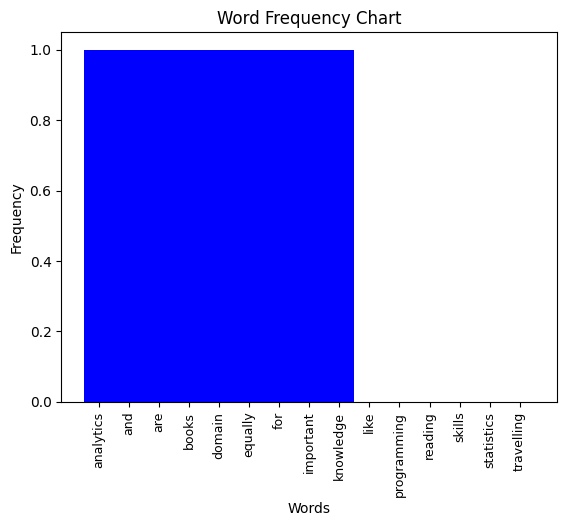

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
words = df.index
freq = df.iloc[:, 0].sort_values(ascending=False)

pos = np.arange(len(words))
width = 1.0
ax = plt.axes(frameon=True)
ax.set_xticks(pos)
ax.set_xticklabels(words, rotation='vertical', fontsize=9)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(pos, freq, width, color='b')
plt.show()

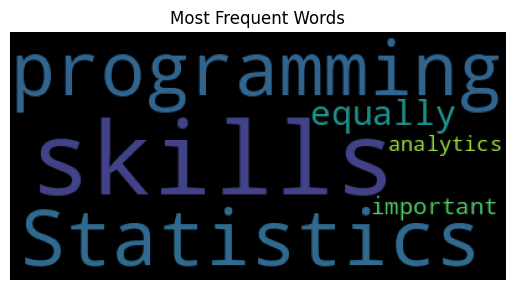

In [19]:
from wordcloud import WordCloud

# Read the whole text.
text = open('Data/text_files/Doc_1.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

***Lexical Dispersion Plot***

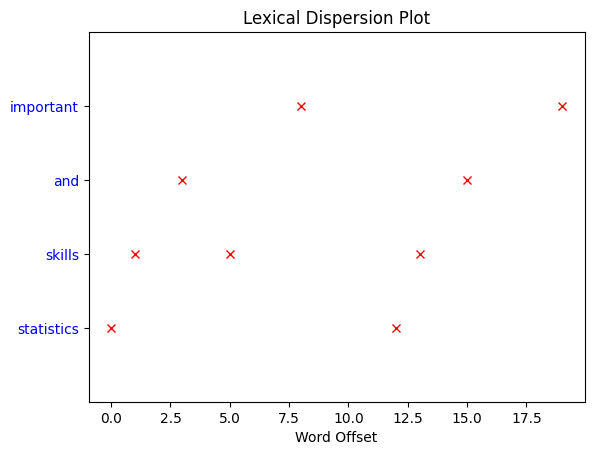

In [21]:
from nltk import word_tokenize

def dispersion_plot(text, words):
    words_token = word_tokenize(text)
    points = [(x,y) for x in range(len(words_token)) for y in range(len(words)) if words_token[x] == words[y]]

    if points:
        x,y=zip(*points)
    else:
        x=y=()

    plt.plot(x,y,"rx",scalex=.1)
    plt.yticks(range(len(words)),words,color="b")
    plt.ylim(-1,len(words))
    plt.title("Lexical Dispersion Plot")
    plt.xlabel("Word Offset")
    plt.show()

text = 'statistics skills, and programming skills are equally important for analytics. statistics skills, and domain knowledge are important for analytics'
dispersion_plot(text, ['statistics', 'skills', 'and', 'important'])

***Co-occurrence Matrix**

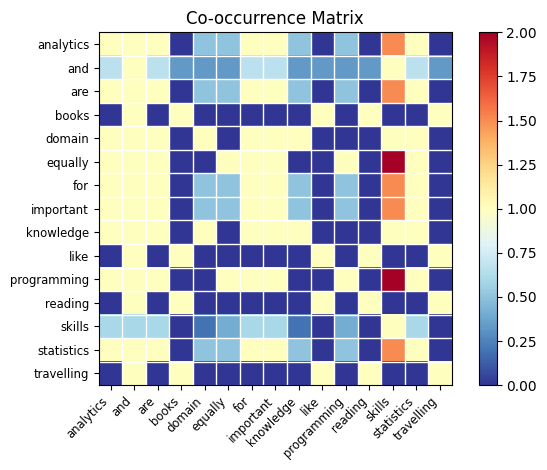

In [23]:
import statsmodels.api as sm
import scipy.sparse as sp
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assume 'docs' is a DataFrame with a column named 'docs' containing text documents

# default unigram model
count_model = CountVectorizer(ngram_range=(1,1)) 
docs_unigram = count_model.fit_transform(docs['docs'])

# co-occurrence matrix in sparse csr format
docs_unigram_matrix = (docs_unigram.T * docs_unigram) 

# fill same word cooccurrence to 0
docs_unigram_matrix.setdiag(0) 

# co-occurrence matrix in sparse csr format
docs_unigram_matrix = (docs_unigram.T * docs_unigram) 
docs_unigram_matrix_diags = sp.diags(1./docs_unigram_matrix.diagonal())

# normalized co-occurrence matrix
docs_unigram_matrix_norm = docs_unigram_matrix_diags * docs_unigram_matrix 

# Get feature names
feature_names = count_model.get_feature_names_out()

df = pd.DataFrame(docs_unigram_matrix_norm.todense(), index=feature_names, columns=feature_names)

sm.graphics.plot_corr(df, title='Co-occurrence Matrix', xnames=list(df.index))
plt.show()